# Distribution Fitting
Comparing exponentional function fits to other distributions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import os
import pandas as pd
import powerlaw
import numpy as np

import warnings
warnings.filterwarnings('ignore')
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron',
    'vascular_2','vascular_3','vascular_1','mitochondrial','root_1','root_2','anthill','fruit_fly_2','fruit_fly_3','fruit_fly_4','fruit_fly_1']

In [3]:

compare_to = ['stretched_exponential', 'truncated_power_law', 'lognormal', 'power_law']

# Initialize an empty list to store the rows of the DataFrame
rows = []

for name in name_list:
    # Load data
    data = pd.read_csv('3. link_df_properties/' + name + '_link_properties.csv', index_col=0)['Link_confinement']
    data = data[data > 0].values
    
    # Fit the data
    fit = powerlaw.Fit(data)
    
    # Temporary dictionary to hold the stats and pvalues for the current name
    row = {'name': name}
    
    for dist in compare_to:
        stat, pvalue = fit.distribution_compare('exponential', dist)
        # Apply filtering: Fill with NaN if p-value > 0.01
        row[f'{dist}_pvalue'] = pvalue
    
    # Append the dictionary to the rows list
    rows.append(row)

# Create a DataFrame from the rows
df = pd.DataFrame(rows)

# Reordering the DataFrame columns: first 'name', then stats and pvalues
df

Calculating best minimal value for power law fit


Assuming nested distributions


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit


Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions


Calculating best minimal value for power law fit


Assuming nested distributions


Calculating best minimal value for power law fit


Assuming nested distributions


Calculating best minimal value for power law fit


Assuming nested distributions


Calculating best minimal value for power law fit


Assuming nested distributions


Calculating best minimal value for power law fit


Assuming nested distributions


,name,stretched_exponential_pvalue,truncated_power_law_pvalue,lognormal_pvalue,power_law_pvalue
0,human_neuron,1.704560e-01,3.396330e-01,3.522404e-01,3.531268e-01
1,rat_neuron,9.510711e-01,4.957822e-01,8.589737e-03,1.062648e-02
2,monkey_neuron,1.756345e-01,1.624573e-01,2.804618e-02,1.625147e-01
3,zebrafish_neuron,3.356208e-06,2.821355e-02,7.542402e-02,2.135581e-01
4,vascular_2,2.466870e-01,4.336812e-01,5.325319e-01,8.218010e-01
5,vascular_3,8.514030e-01,7.221824e-01,1.016927e-03,2.604426e-02
6,vascular_1,1.513410e-01,3.954103e-01,7.667167e-01,1.733967e-01
7,mitochondrial,8.632609e-03,1.571963e-01,2.994874e-01,4.096879e-01
8,root_1,6.980509e-01,6.774013e-01,7.214713e-05,6.666953e-02
9,root_2,6.074246e-01,7.252729e-01,9.259904e-01,5.578329e-01


In [4]:
df.round(3)

,name,stretched_exponential_pvalue,truncated_power_law_pvalue,lognormal_pvalue,power_law_pvalue
0,human_neuron,0.170,0.340,0.352,0.353
1,rat_neuron,0.951,0.496,0.009,0.011
2,monkey_neuron,0.176,0.162,0.028,0.163
3,zebrafish_neuron,0.000,0.028,0.075,0.214
4,vascular_2,0.247,0.434,0.533,0.822
5,vascular_3,0.851,0.722,0.001,0.026
6,vascular_1,0.151,0.395,0.767,0.173
7,mitochondrial,0.009,0.157,0.299,0.410
8,root_1,0.698,0.677,0.000,0.067
9,root_2,0.607,0.725,0.926,0.558


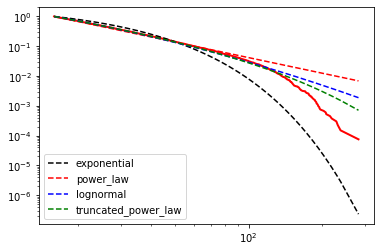

In [5]:
ax=fit.plot_ccdf(color='r',linewidth=2)
fit.exponential.plot_ccdf(color='k',linestyle='--',ax=ax,label='exponential')
fit.power_law.plot_ccdf(color='r',linestyle='--',ax=ax,label='power_law')
fit.lognormal.plot_ccdf(color='b',linestyle='--',ax=ax,label='lognormal')
fit.truncated_power_law.plot_ccdf(color='g',linestyle='--',ax=ax,label='truncated_power_law')
plt.legend()